# Tutorial document for RGB Hexagram (Kondo 2025)

This jupyter lab demonstrates the creation of RGB hexagrams based on Kondo (2025) and a tutorial on analysis with RGB hexagrams using sample data. <br>
Please see other jupyter labs for examples of application to 4D and 5D data.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

# Create RGB Hexagram array data

The size of the RGB hexagram can be specified by changing the coefficient k (see Kondo 2025 for details). <br>
(k<=11 is recommended.)

In [2]:
from generate_rgb_hex import generate_rgb_hex

# input RGB hexagram size parameter
k = 2

# generate RGB hexagram array-> r_hex:Red data, g_hex:Green data, b_data:Blue data, num_hex:Area data
# r,g,b_hex array data between 0 to 1, num_hex data between 1 to 15
r_hex, g_hex, b_hex, num_hex = generate_rgb_hex(k)

grid size : 24
center pos: 6
RGB pos for Green:
R: 6, 22
G: 3, 6
B: 22, 3
CYM pos:
C: 6, 3
Y: 3, 22
M: 22, 6
----
basic RGB-W grid num: 2
one-cycle grid num  : 18
max-cycle grid num  : 30
changing ratio      : 85.0
min changing ratio  : 51.0
----
sample grid cycle
R->Y->G->C->B->M->...
rgb_hex shape: (24, 24)
----
output_filename-> r_file: rw_hex_test_d.csv , g_file: gw_hex_test_d.csv , b_file: bw_hex_test_d.csv n_file nw_hex_test_d.csv


# Plotting base RGB hexagram results

r_hex: Red, g_hex: Green, and b_hex: Blue normalized RGB value distribution are plotted. <br>
num_hex is the Areas of RGB hexagram

includes Axes that are not compatible with tight_layout, so results might be incorrect.


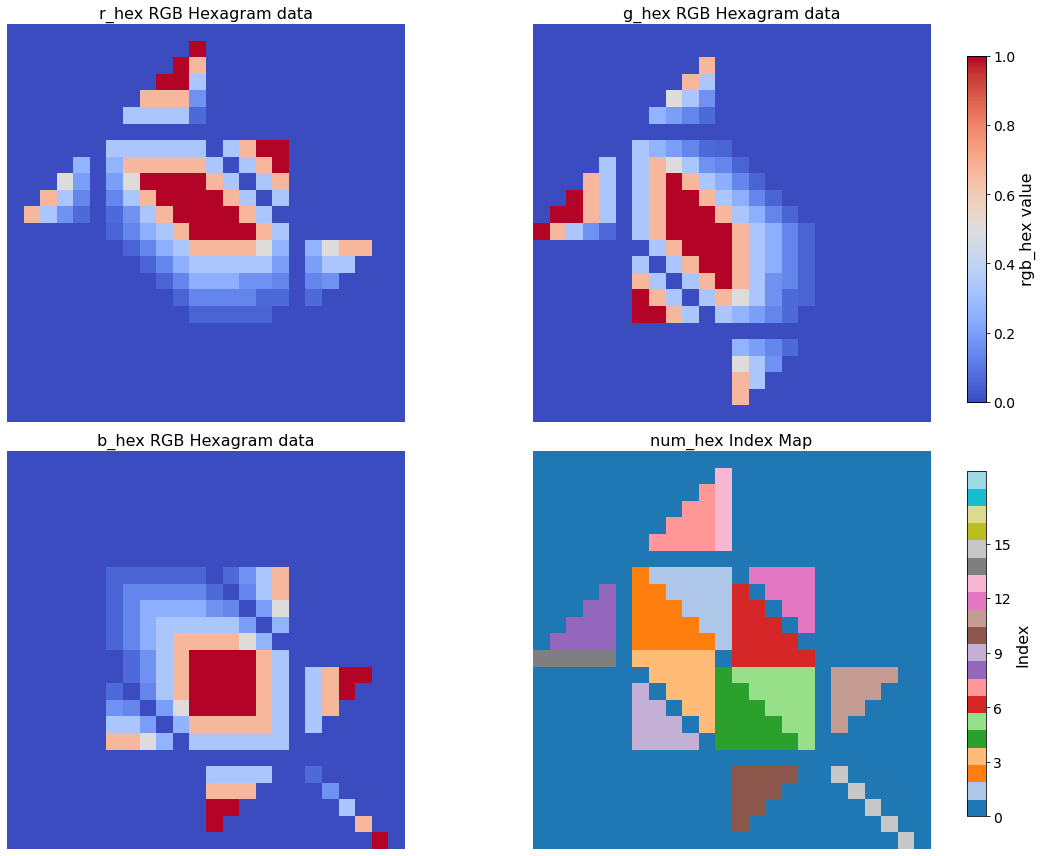

In [3]:
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1])  # 2行3列

# position of each plot
ax0 = fig.add_subplot(gs[0, 0])  # r_hex
ax1 = fig.add_subplot(gs[0, 1])  # g_hex
cax1 = fig.add_axes([0.82, 0.53, 0.015, 0.4]) # [left, bottom, width, height]

ax2 = fig.add_subplot(gs[1, 0])  # b_hex
ax3 = fig.add_subplot(gs[1, 1])  # num_hex
cax3 = fig.add_axes([0.82, 0.05, 0.015, 0.4])

# r_hex
im0 = ax0.imshow(r_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax0.set_title('r_hex RGB Hexagram data', fontsize=16)
ax0.axis('off')

# g_hex
im1 = ax1.imshow(g_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax1.set_title('g_hex RGB Hexagram data', fontsize=16)
ax1.axis('off')
fig.colorbar(im1, cax=cax1, label='g_hex value')
cb1 = fig.colorbar(im1, cax=cax1)
cb1.set_label('rgb_hex value', fontsize=16)
cb1.ax.tick_params(labelsize=14)

# b_hex
im2 = ax2.imshow(b_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax2.set_title('b_hex RGB Hexagram data', fontsize=16)
ax2.axis('off')

# num_hex
im3 = ax3.imshow(num_hex[:, :] * 256.0, vmin=0, vmax=19, cmap='tab20', origin='lower')
ax3.set_title('num_hex Index Map', fontsize=16)
ax3.axis('off')
cb3 = fig.colorbar(im3, cax=cax3)
cb3.set_label('Index', fontsize=16)
cb3.set_ticks(np.arange(0, 16, 3))
cb3.ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [4]:
print(r_hex.shape)
print(g_hex.shape)
print(b_hex.shape)

(24, 24)
(24, 24)
(24, 24)


# Plotting RGB hexagrams by RGB values

Generated RGB values are used for plotting color plots.

(24, 24)


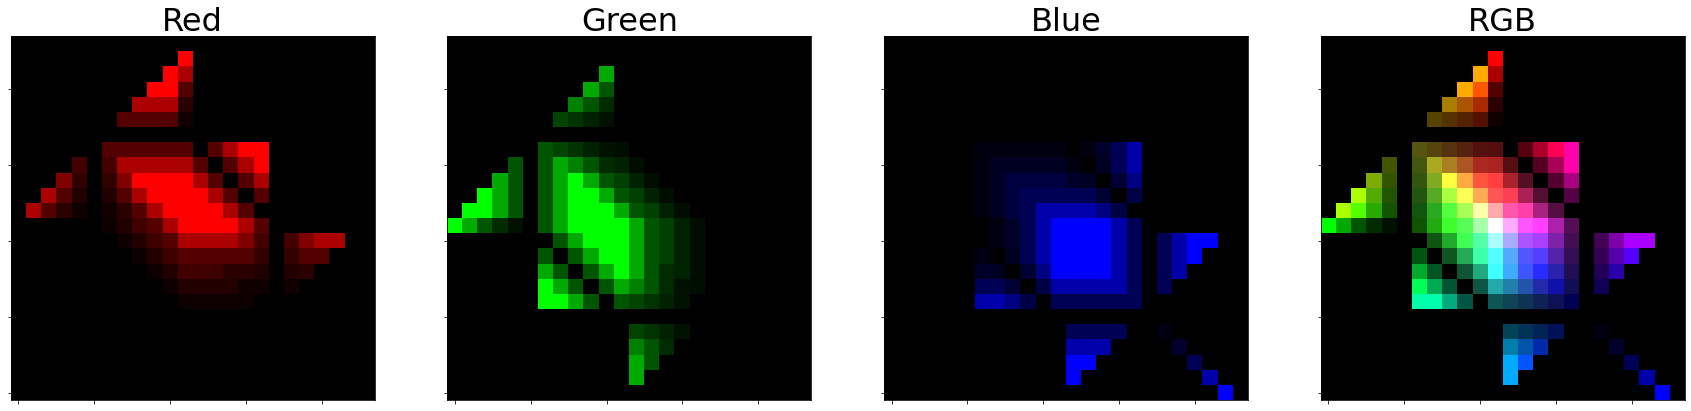

In [5]:
# Read CSV files
r_df = pd.read_csv('rw_hex_test_d.csv', header=None)
g_df = pd.read_csv('gw_hex_test_d.csv', header=None)
b_df = pd.read_csv('bw_hex_test_d.csv', header=None)
n_df = pd.read_csv('nw_hex_test_d.csv', header=None)

# Replace negative values with zero
n_df[n_df < 0] = 0
n_df[n_df > 100] = 0

r_df = r_df.iloc[:, :]
g_df = g_df.iloc[:, :]
b_df = b_df.iloc[:, :]
n_df = n_df.iloc[:, :]

# Normalize RGB values to the range 0~1
r = np.clip(r_df.values, 0, 1)
g = np.clip(g_df.values, 0, 1)
b = np.clip(b_df.values, 0, 1)

# Combine RGB values into a single array
rgb = np.dstack((r, g, b))

# Convert to 1 column
r_series = r_df.stack().reset_index(drop=True)
g_series = g_df.stack().reset_index(drop=True)
b_series = b_df.stack().reset_index(drop=True)

print(r_df.shape)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(30, 15))
fsiz=32

# Colormap Definition
n_bins = 256  # Colormap fineness
r_colors = [(0, 0, 0), (1, 0, 0)]  # RGB values in the range 0-1
r_cmap_name = 'black_to_red'

g_colors = [(0, 0, 0), (0, 1, 0)]
g_cmap_name = 'black_to_green'

b_colors = [(0, 0, 0), (0, 0, 1)]
b_cmap_name = 'black_to_blue'

# Create color maps
cmr = LinearSegmentedColormap.from_list(r_cmap_name, r_colors, N=n_bins)
cmg = LinearSegmentedColormap.from_list(g_cmap_name, g_colors, N=n_bins)
cmb = LinearSegmentedColormap.from_list(b_cmap_name, b_colors, N=n_bins)

# plotting each data
im1 = axs[0].imshow(r, cmap=cmr, origin='lower')
axs[0].set_title('Red', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im2 = axs[1].imshow(g, cmap=cmg, origin='lower')
axs[1].set_title('Green', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im3 = axs[2].imshow(b, cmap=cmb, origin='lower')
axs[2].set_title('Blue', fontsize=fsiz)
axs[2].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im4 = axs[3].imshow(rgb, interpolation='nearest', origin='lower')
axs[3].set_title('RGB', fontsize=fsiz)
axs[3].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.show()

# Plotting an RGB hexagram using the sample 3D data

This tutorial shows the distribution of sample 3D data on an RGB hexagram generated. <br>
For tutorials using 4D and 5D data, please see other jupyter labs.

In [6]:
import numpy as np

# Average scores (settable for each subject and study time)
mean_scores = [20, 55, 75]  # 3 subjects and stydy time

# Standard deviation
std_dev = 15

# Random seed
np.random.seed(0)

# Number of persons
psn = 100000

# Generate scores (psn x number of subjects)
scores = np.random.normal(loc=mean_scores, scale=std_dev, size=(psn, len(mean_scores)))

# Round to nearest integer
scores = np.rint(scores)

# Create max score array: default 100, but 200 for subjects with mean 150
max_scores = np.where(np.array(mean_scores) == 150, 200, 100)

# Clip each column individually using broadcasting
scores = np.clip(scores, -1, max_scores)

# Convert to int
scores = scores.astype(int)

# Display top 5 rows
print(scores[:5])

[[46 61 90]
 [54 83 60]
 [34 53 73]
 [26 57 97]
 [31 57 82]]


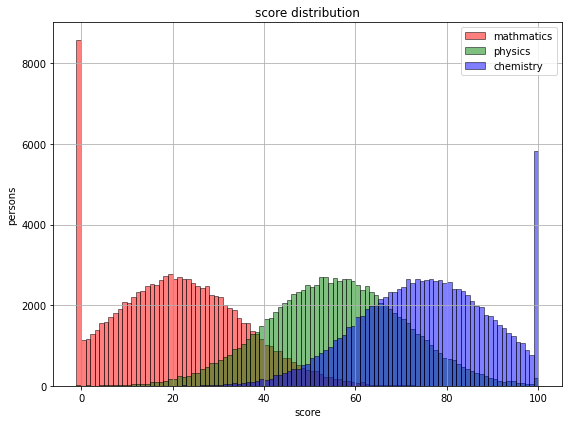

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Colors and labels for each subject
subjects = ['mathmatics', 'physics', 'chemistry']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))

# Histogram of each subject plotted over one another
for i in range(3):
    plt.hist(scores[:, i],
             bins=101,
             range=(-1, 100),
             alpha=0.5,
             color=colors[i],
             label=subjects[i],
             edgecolor='black')

plt.title('score distribution')
plt.xlabel('score')
plt.ylabel('persons')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

# Prepare an empty array for normalization (same shape)
normalized_scores = np.zeros_like(scores, dtype=float)

# Normalized (per column) for each subject
for i in range(scores.shape[1]):
    max_val = np.max(scores[:, i])
    normalized_scores[:, i] = (scores[:, i] + 1) / (max_val + 1)  # -1点→0, max→1になるよう調整

# Display of top 5 rows
print(normalized_scores[:5])

[[0.55294118 0.61386139 0.9009901 ]
 [0.64705882 0.83168317 0.6039604 ]
 [0.41176471 0.53465347 0.73267327]
 [0.31764706 0.57425743 0.97029703]
 [0.37647059 0.57425743 0.82178218]]


In [9]:
#initialized position data
pos_data_rgb = np.zeros((r.shape[0], r.shape[1])) # np.maxval(scores)

start_time = time.time()

for i in range(psn):
    tmp_data_rgb = np.zeros((r.shape[0], r.shape[1]))
    tmp_data_r   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,0]
    tmp_data_g   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,1]
    tmp_data_b   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,2]
    
    # Calculate the value of the difference in each coordinate of the RGB hexagram
    tmp_data_rgb = (r-tmp_data_r)**2.0 + (g-tmp_data_g)**2.0 + (b-tmp_data_b)**2.0
    
    # Get the index (coordinates) of the minimum value
    min_index = np.unravel_index(np.argmin(tmp_data_rgb), tmp_data_rgb.shape)
    
    # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
    pos_data_rgb[min_index[0],min_index[1]] += 1

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",psn,", RGB hexagram size parameter:",k)

print(pos_data_rgb.shape)

elapsed time: 2.96 sec, data size: 100000 , RGB hexagram size parameter: 2
(24, 24)


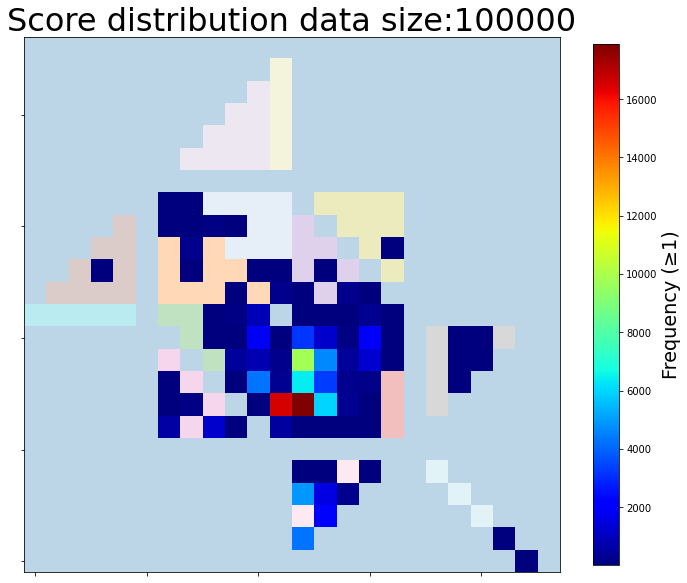

In [10]:
# Mask to plot only areas with a value greater than or equal to 1
masked_data = np.ma.masked_less(pos_data_rgb, 1)

# Plot the results and add a color bar
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
fsiz=32
im = axs.imshow(n_df, cmap='tab20', origin='lower',alpha=0.3)
im = axs.imshow(masked_data, cmap='jet', origin='lower')

# Added color bar
cbar = plt.colorbar(im, ax=axs, shrink=0.8)
cbar.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)

axs.set_title('Score distribution data size:'+str(psn), fontsize=fsiz)
axs.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Percentage of data in each Area of the RGB hexagram

In [11]:
# sum of pos_data_rgb
total_sum_rgb = np.sum(pos_data_rgb)

sum_xy_list = []  # Store each sum of n_df = 1 to 15
    
for i in range(1, 16):
    mask = (n_df * 256.0 == i)
    indices = np.where(mask)
    sum_xy = np.sum(pos_data_rgb[indices])    # Sum of Areas that match each n_df value
    sum_xy_list.append(sum_xy)
    print("percentage of Area", i, ": ", f"{100.0 * sum_xy / total_sum_rgb:.3f}", "%")


percentage of Area 1 :  0.335 %
percentage of Area 2 :  0.424 %
percentage of Area 3 :  8.413 %
percentage of Area 4 :  61.530 %
percentage of Area 5 :  13.348 %
percentage of Area 6 :  0.688 %
percentage of Area 7 :  0.000 %
percentage of Area 8 :  0.001 %
percentage of Area 9 :  1.968 %
percentage of Area 10 :  13.220 %
percentage of Area 11 :  0.050 %
percentage of Area 12 :  0.001 %
percentage of Area 13 :  0.000 %
percentage of Area 14 :  0.000 %
percentage of Area 15 :  0.022 %
